# Housing Prices Modeling Notebook

### By Jonathan Buser and Chuck Nadel

### Importing Packages

In [132]:
counter = 0 # Basic Wrapper to Save Time

In [ ]:
if counter == 0:
    # Standard Packages
    import pandas as pd
    import numpy as np

    # Viz Packages
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Scipy Stats
    import scipy.stats as stats 
    from scipy.stats import pearsonr

    # Statsmodel Api
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.outliers_influence import variance_inflation_factor


    # SKLearn Modules
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import RFE
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split
    import sklearn.metrics as metrics
    from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import PolynomialFeatures

    #Add Extra Modules
    from math import sin, cos, sqrt, atan2
    from datetime import datetime, timedelta
    import cpi
    import re



    # Suppress future and deprecation warnings
    import warnings
    warnings.filterwarnings("ignore", category= FutureWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning) 
    pd.options.display.max_columns = None
    pd.options.display.width = None
    counter = 1

### Data

In [97]:
housingDF = pd.read_csv("data/kc_house_data.csv")
df_school = pd.read_csv('data/AIM-EOC-MSP-SBA_Assessments_School__with_suppression_-_new_format__2017.csv')
crime = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')


# Now lets look at the data for each source
* House Data
* School Grade Data
* Crime Data

In [98]:
housingDF.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [99]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [100]:
df_school.head(2)

,ESD,County,District,DistrictCode,School,SchoolCode,schoolYear,testAdministration,Subject,GradeLevel,StudentGroup,suppressed,suppressReason,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,countMetStandardWithoutPP,PercentMetStandardWithoutPP,percentMeetingStandardExcludingNoScore,countLevel4,PercentLevel4,countLevel3,PercentLevel3,countLevelBasic,PercentLevelBasic,countLevel2,PercentLevel2,countLevel1,PercentLevel1,countNoScore,percentNoScore,countNotMet,PercentNotMet,countExcusedAbsence,countExempted
0,Northwest Educational Service District 189,Snohomish County,Marysville School District,31025.0,10th Street School,1656,2016-2017,SBA,ELA,6th,All,True,Cross Organization: School Home Partnership Pr...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northwest Educational Service District 189,Snohomish County,Marysville School District,31025.0,10th Street School,1656,2016-2017,SBA,ELA,6th,Male,True,Cross Organization: School Home Partnership Pr...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250540 entries, 0 to 250539
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ESD                                     241913 non-null  object 
 1   County                                  242208 non-null  object 
 2   District                                242208 non-null  object 
 3   DistrictCode                            242208 non-null  float64
 4   School                                  250540 non-null  object 
 5   SchoolCode                              250540 non-null  int64  
 6   schoolYear                              250540 non-null  object 
 7   testAdministration                      250540 non-null  object 
 8   Subject                                 250540 non-null  object 
 9   GradeLevel                              250540 non-null  object 
 10  StudentGroup                            2505

In [102]:
crime.head(2)

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.0,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.0,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983


In [103]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

# Distance Calculation

* We look at the following to see if there are locations that have higher price then others
* Create a list of the areas we found are high priced
* Created a now column that finds the shortest distance between the house and the areas we determined

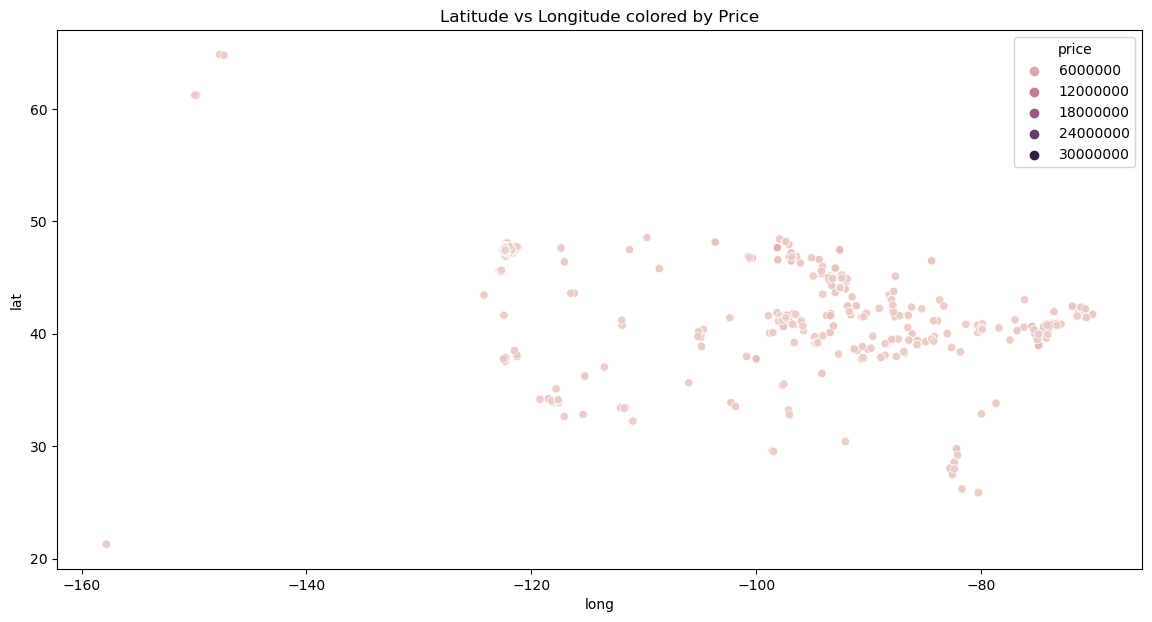

In [104]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=housingDF)
ax.set_aspect('equal')
plt.title("Latitude vs Longitude colored by Price")
plt.show()

Realize that we have bad data in the lat long ield so we will have to remove the outliers outside Kings County

In [105]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

urban_centers_dict = {
    "Mercer Island": (47.559367, -122.219335),
    "Magnolia": (47.651347, -122.404011),
    "Kirkland": (47.682111, -122.205549),
    "Somerset": (47.557850, -122.147104),
    "Beaver Lake": (47.590782, -121.998691),
    "Union Bay": (47.647763, -122.282622),
    "Medina": (47.625635, -122.232134)
}

def closest_urban_center(row):
    lat1, lon1 = row['lat'], row['long']
    distances = [haversine(lat1, lon1, lat2, lon2) for lat2, lon2 in urban_centers_dict.values()]
    return min(distances)

housingDF['distance'] = housingDF.apply(closest_urban_center, axis=1)

# Create a dataframe of school districts.

I went to google maps to look up each distict in Kings County and found the GPS location of the center of each

In [106]:
# Define a dictionary with school district information
district_dict = {
    17001: ['Seattle', 47.604224, -122.310822],
    17210: ['Federal Way', 47.306740, -122.334571],
    17216: ['Enumclaw', 47.202359, -121.989672],
    17400: ['Mercer Island', 47.563806, -122.221739],
    17401: ['Highline', 47.503040, -122.333787],
    17402: ['Vashon Island', 47.415653, -122.465464],
    17403: ['Renton', 47.480680, -122.194300],
    17404: ['Skykomish', 47.709979, -121.358584],
    17405: ['Bellevue', 47.601939, -122.153399],
    17406: ['Tukwila', 47.465515, -122.264383],
    17408: ['Auburn', 47.298994, -122.209005],
    17409: ['Tahoma', 47.408238, -121.978171],
    17410: ['Snoqualmie Valley', 47.467175, -121.721867],
    17411: ['Issaquah', 47.541392, -122.042553],
    17412: ['Shoreline', 47.758887, -122.340132],
    17414: ['Lake Washington', 47.682244, -122.116046],
    17415: ['Kent', 47.370687, -122.179470],
    17417: ['Northshore', 47.768389, -122.152624],
    27417: ['Fife', 47.246443, -122.331492],
    17407: ['Riverview', 47.706997, -121.847689]
}

# Create a dataframe from the dictionary
df_school_district = pd.DataFrame.from_dict(district_dict, orient='index', columns=['district', 'lat', 'long'])
df_school_district.reset_index(inplace=True)
df_school_district.rename(columns={'index': 'DistrictCode'}, inplace=True)

# Add School Scores to data

* Create a dataframe of School Districts with the average grade of the students

In [107]:
df_school.dropna(subset=['countLevel4'], inplace=True)
grouped = df_school.groupby("DistrictCode")["PercentMetStandardIncludingPP"].mean()
grouped = grouped.reset_index()
df_school_district = df_school_district.merge(grouped, on="DistrictCode")
df_school_district = df_school_district.rename(columns={"PercentMetStandardIncludingPP": "average_grade"})

Added the average grade to the data by finding the closest district to the house

* we know this isn't perfect but for the timeframe this is the easiest way to do it.

In [108]:
# Calculate haversine distances between all the points in the data DataFrame and the df_school_district DataFrame
distances = df_school_district.apply(lambda x: np.sqrt((housingDF['lat'] - x['lat'])**2 + (housingDF['long'] - x['long'])**2), axis=1)

# Find the index of the minimum value in each row
min_idx = distances.idxmin(axis=0)

# Look up the corresponding average_grade value in the df_school_district DataFrame
housingDF = housingDF.assign(school_grade=df_school_district.loc[min_idx, 'average_grade'].values)


# Look at the distrobution of price

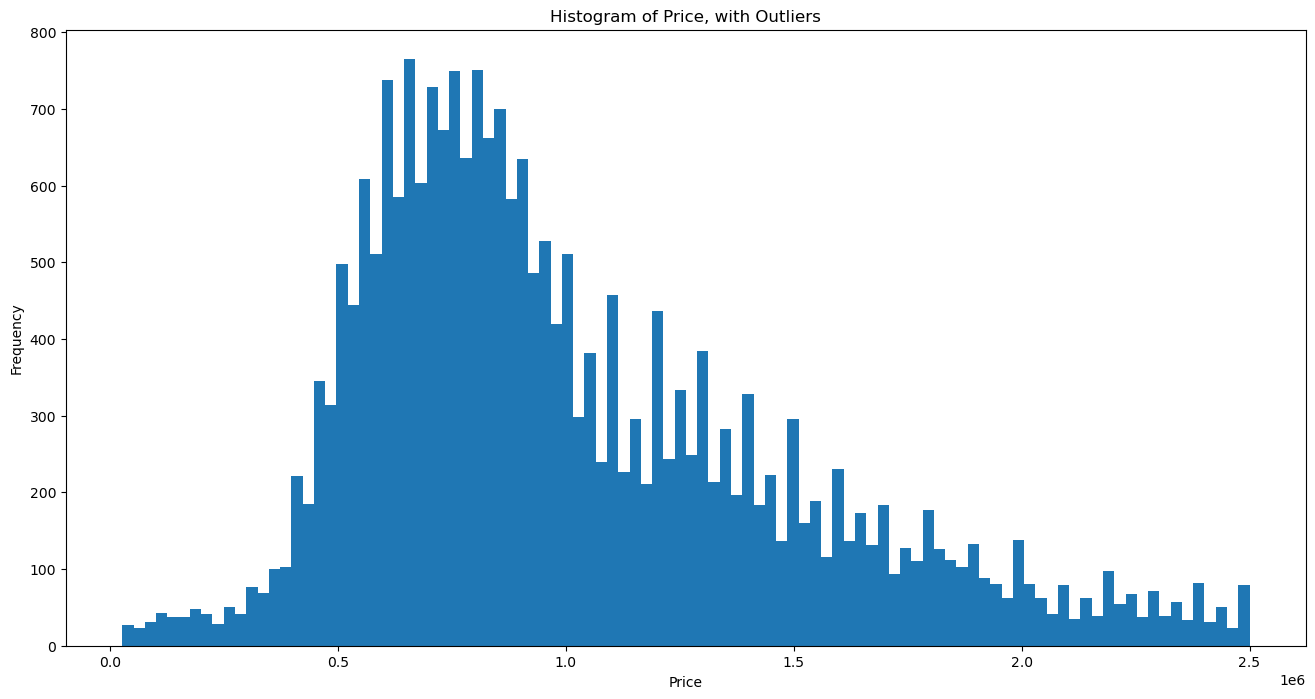

In [134]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price, with Outliers')
plt.show()

# Looking at how some of the columns relate to price

Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

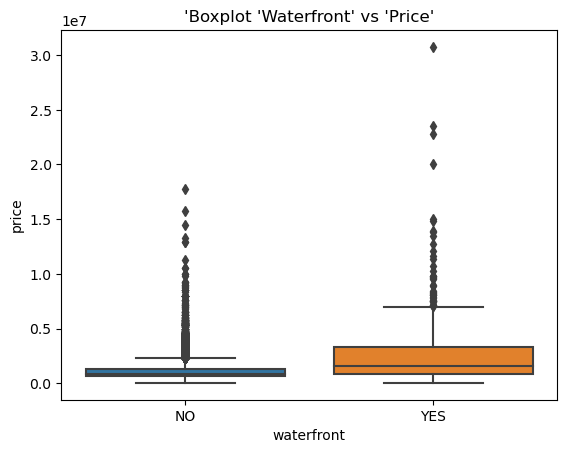

In [110]:
housingDF['waterfront'] = housingDF['waterfront'].astype('category')
sns.boxplot(x='waterfront', y='price', data=housingDF)
plt.title("'Boxplot 'Waterfront' vs 'Price'")

Text(0.5, 1.0, "'Regplot 'sqft_living' vs 'Price'")

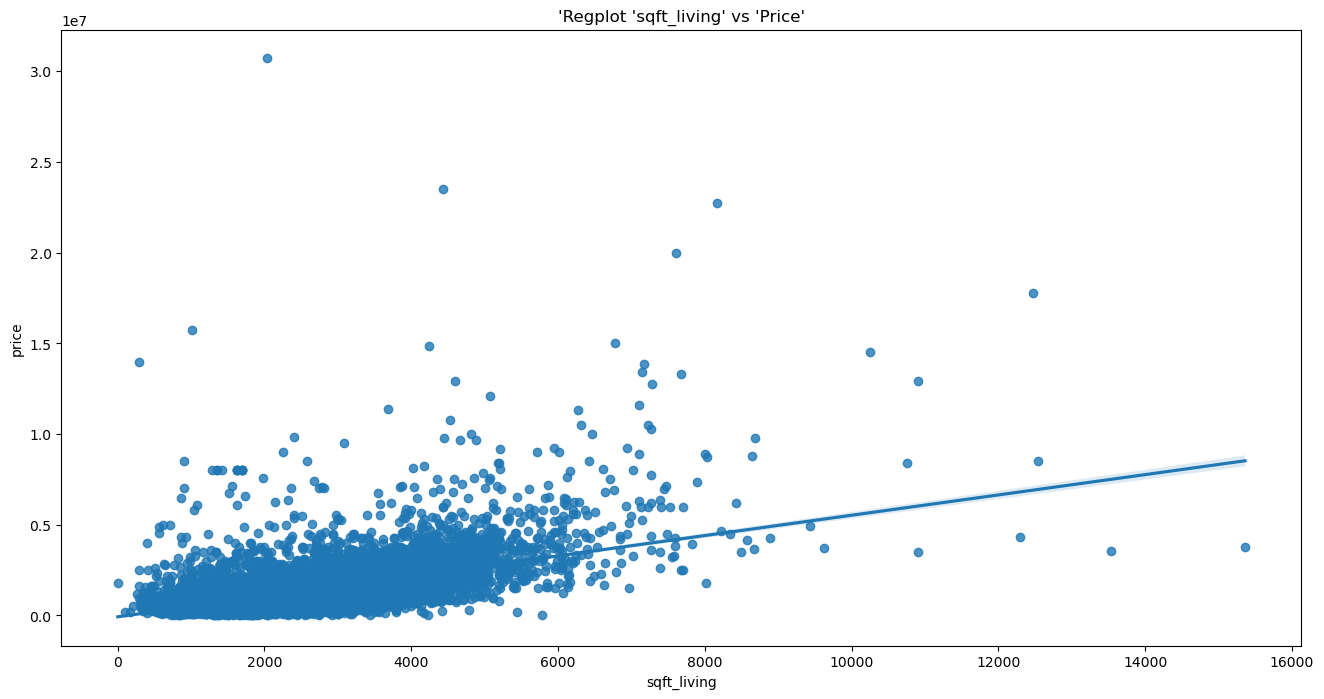

In [111]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=housingDF)
plt.title("'Regplot 'sqft_living' vs 'Price'")

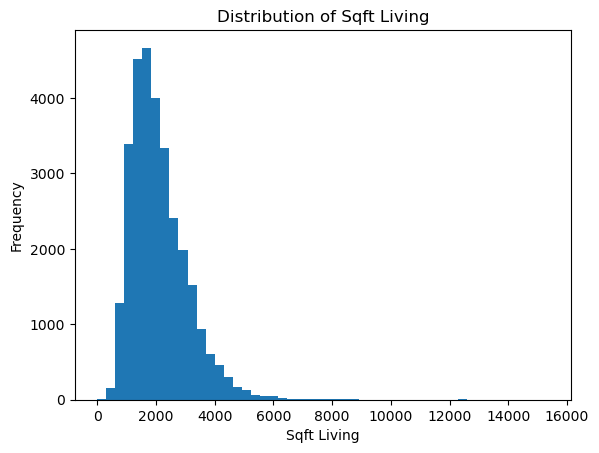

In [112]:
plt.hist(housingDF['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

In [113]:
housingDF = housingDF[housingDF['sqft_living'] <= 5000]
housingDF = housingDF[housingDF['sqft_living'] >= 100]

In [114]:
housingDF = housingDF[housingDF['distance'] <= 25]

In [115]:
housingDF = housingDF[housingDF['price'] <= 2500000]

# Check map again

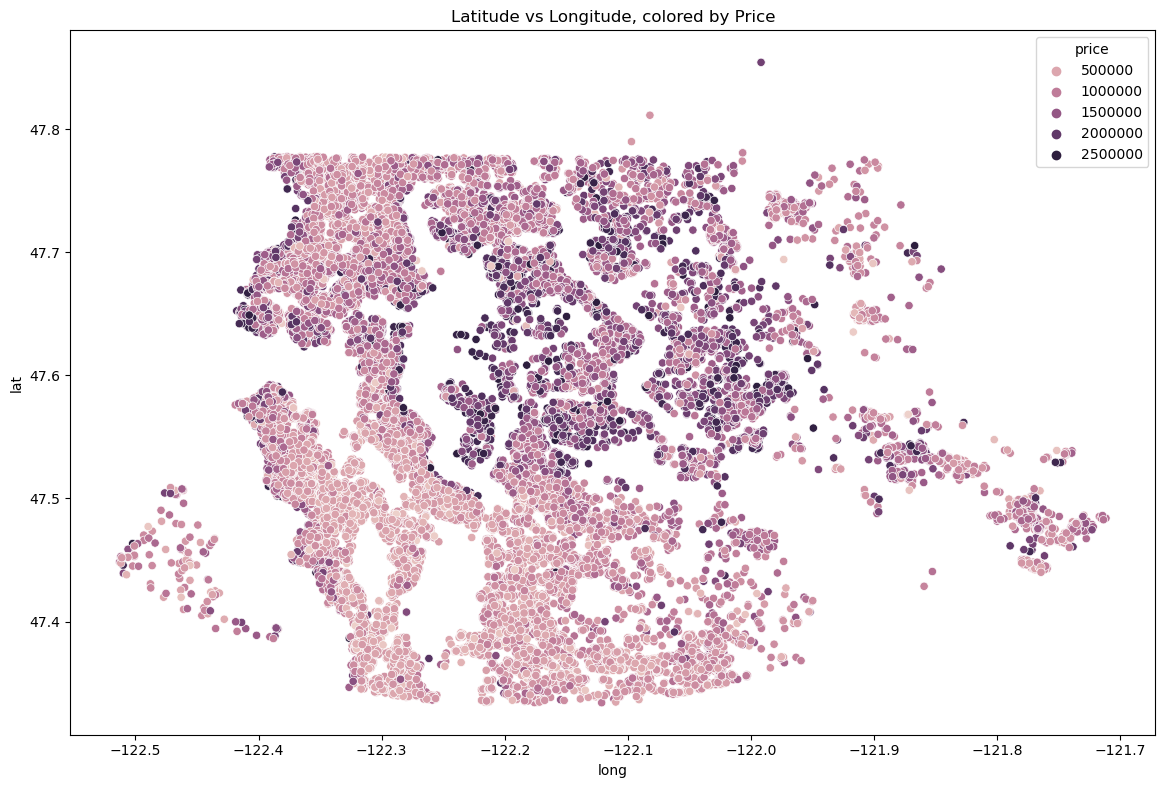

In [116]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=housingDF)
ax.set_aspect('equal')
plt.title("Latitude vs Longitude, colored by Price")
plt.show()

Charts after removal of over 2.5mill houses and getting rid of sqft_living outliers and houses outside of Kings County

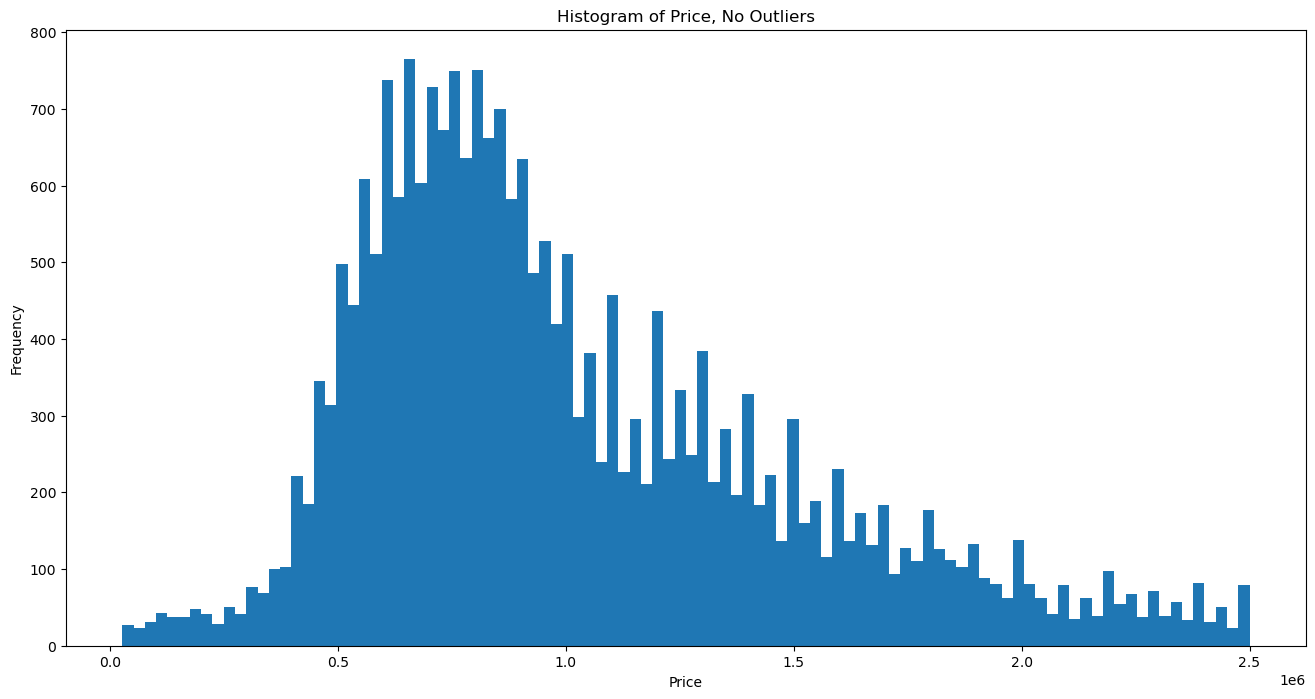

In [133]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price, No Outliers')
plt.show()

Text(0.5, 1.0, "'House Size (sqft)' vs 'Price(USD)'")

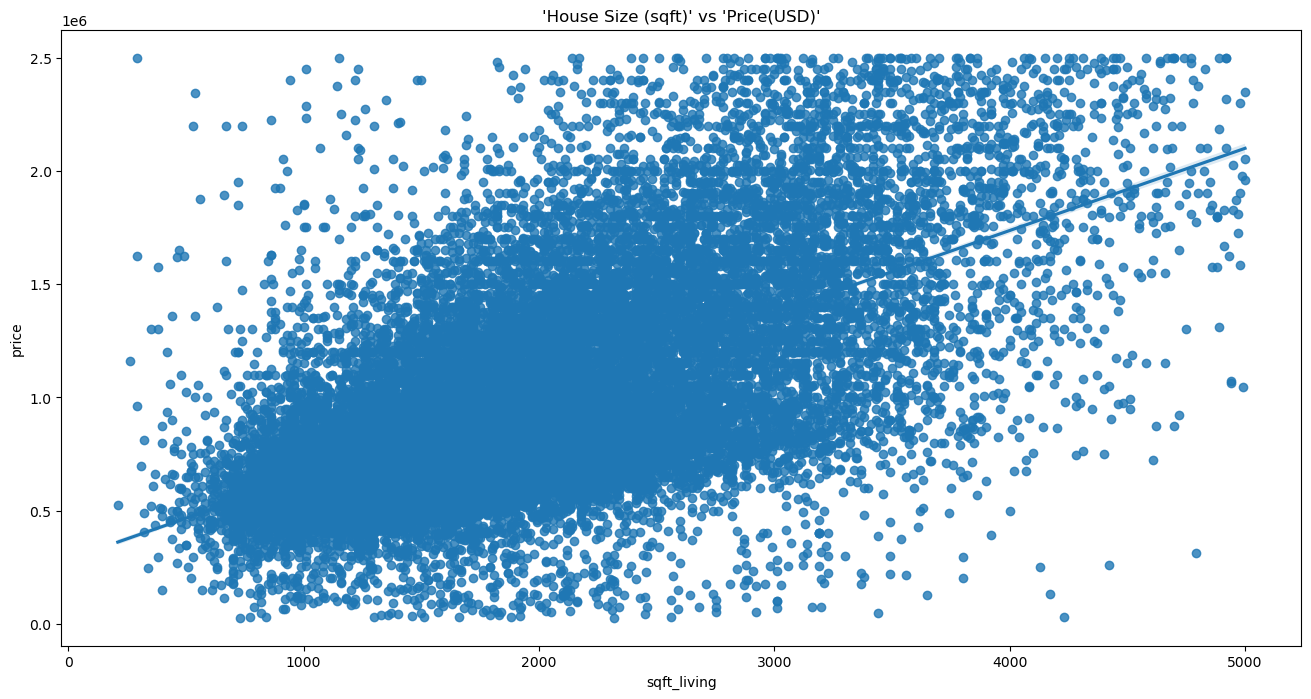

In [118]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=housingDF)
plt.title("'House Size (sqft)' vs 'Price(USD)'")

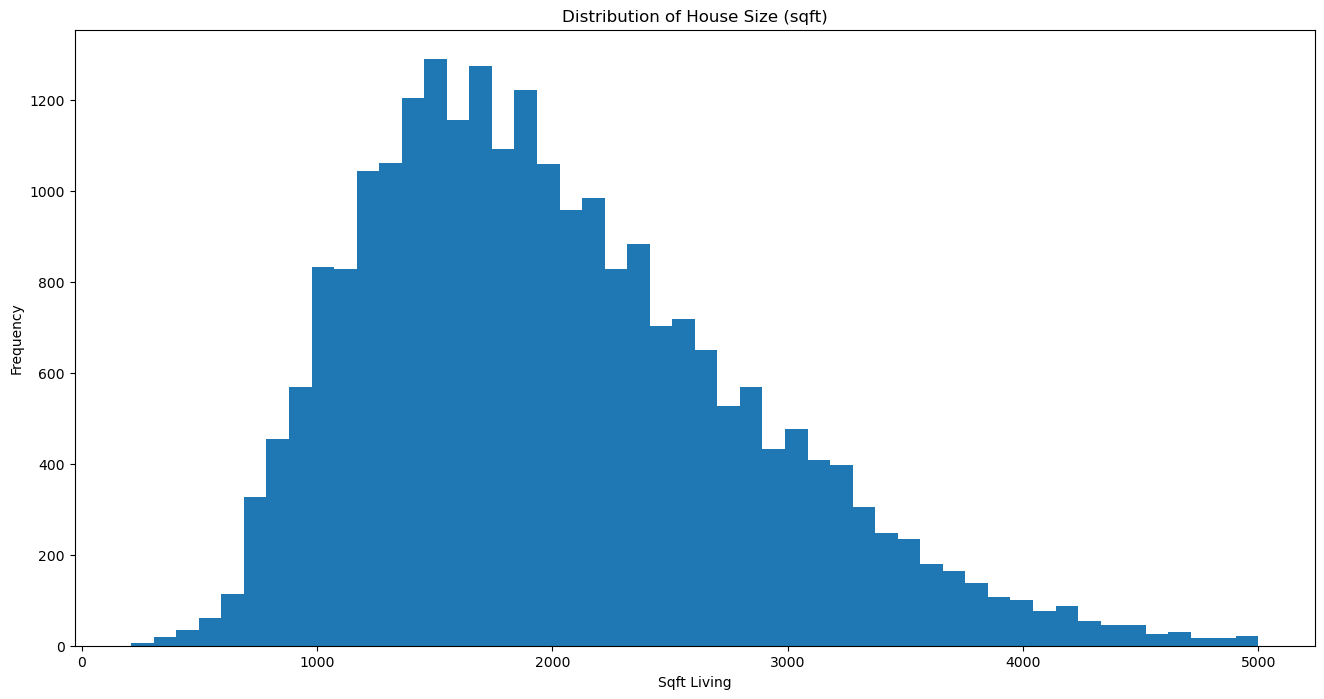

In [119]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['sqft_living'], bins=50)
plt.title("Distribution of House Size (sqft)")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, "'Boxplot 'Greenbelt' vs 'Price'")

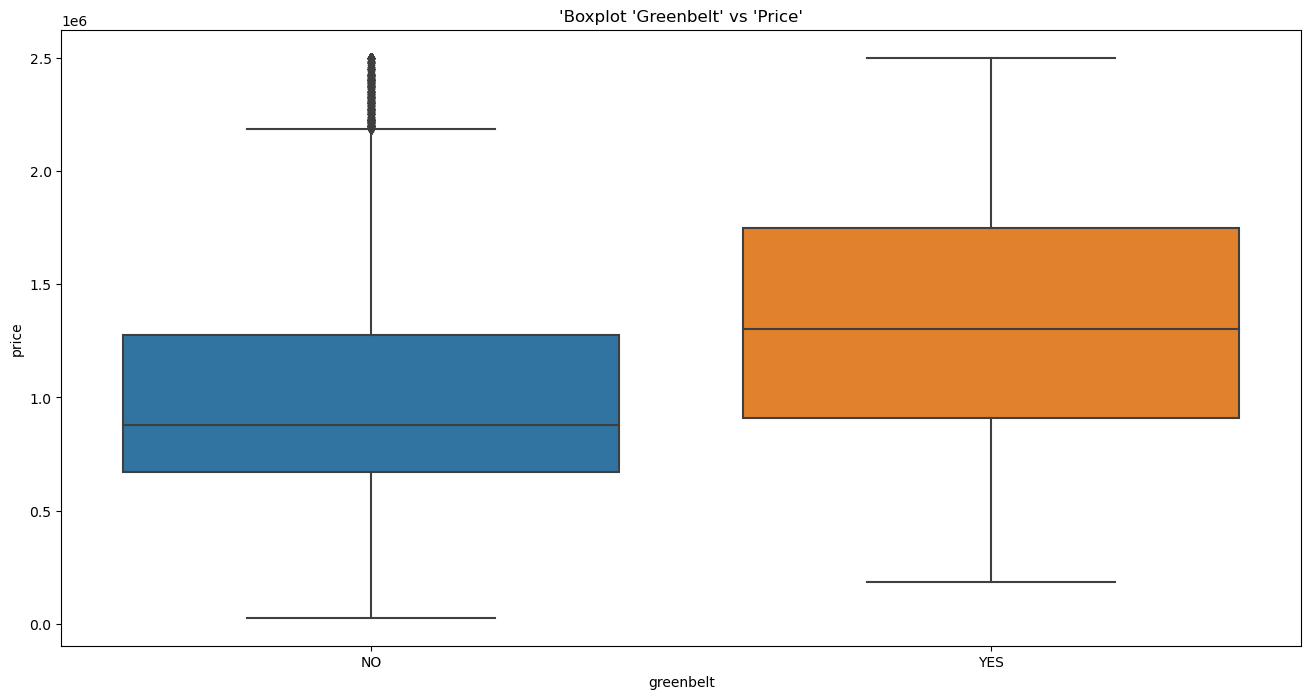

In [120]:
plt.figure(figsize=(16,8))
housingDF['greenbelt'] = housingDF['greenbelt'].astype('category')
sns.boxplot(x='greenbelt', y='price', data=housingDF)
plt.title("'Boxplot 'Greenbelt' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Nuisance' vs 'Price'")

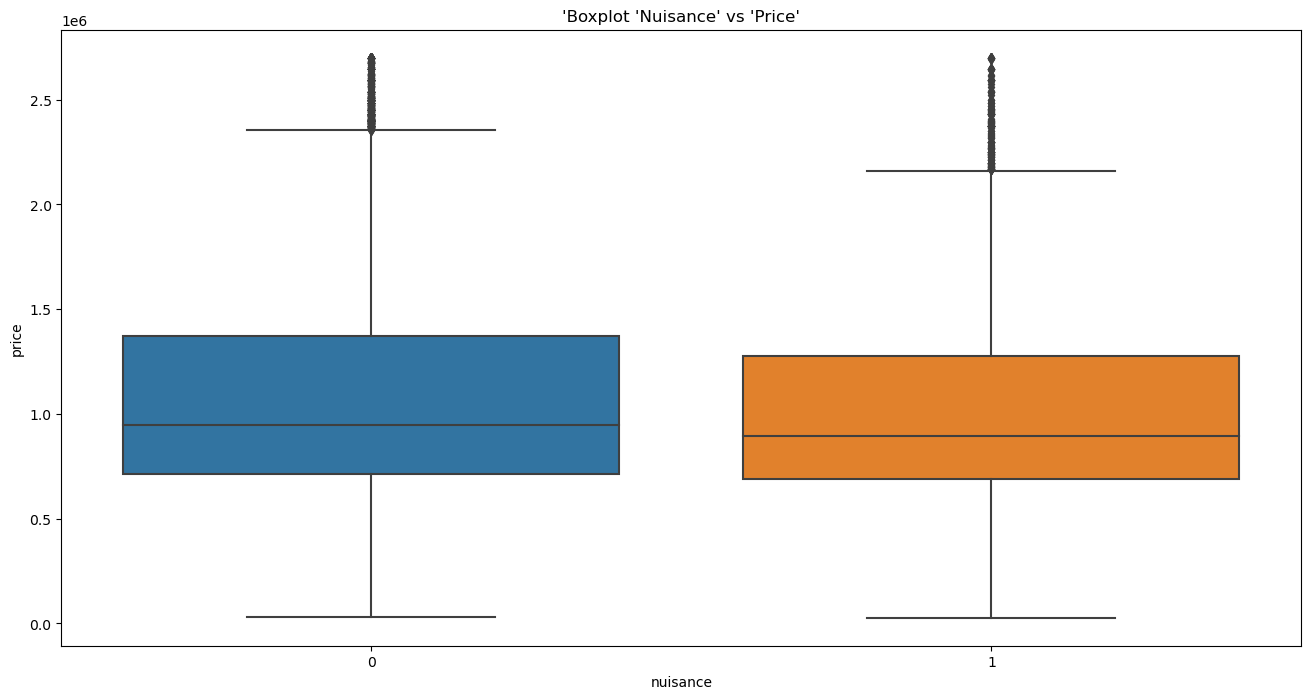

In [121]:
plt.figure(figsize=(16,8))
housingDF['nuisance'] = housingDF['nuisance'].astype('category')
sns.boxplot(x='nuisance', y='price', data=data)
plt.title("'Boxplot 'Nuisance' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Heat Source' vs 'Price'")

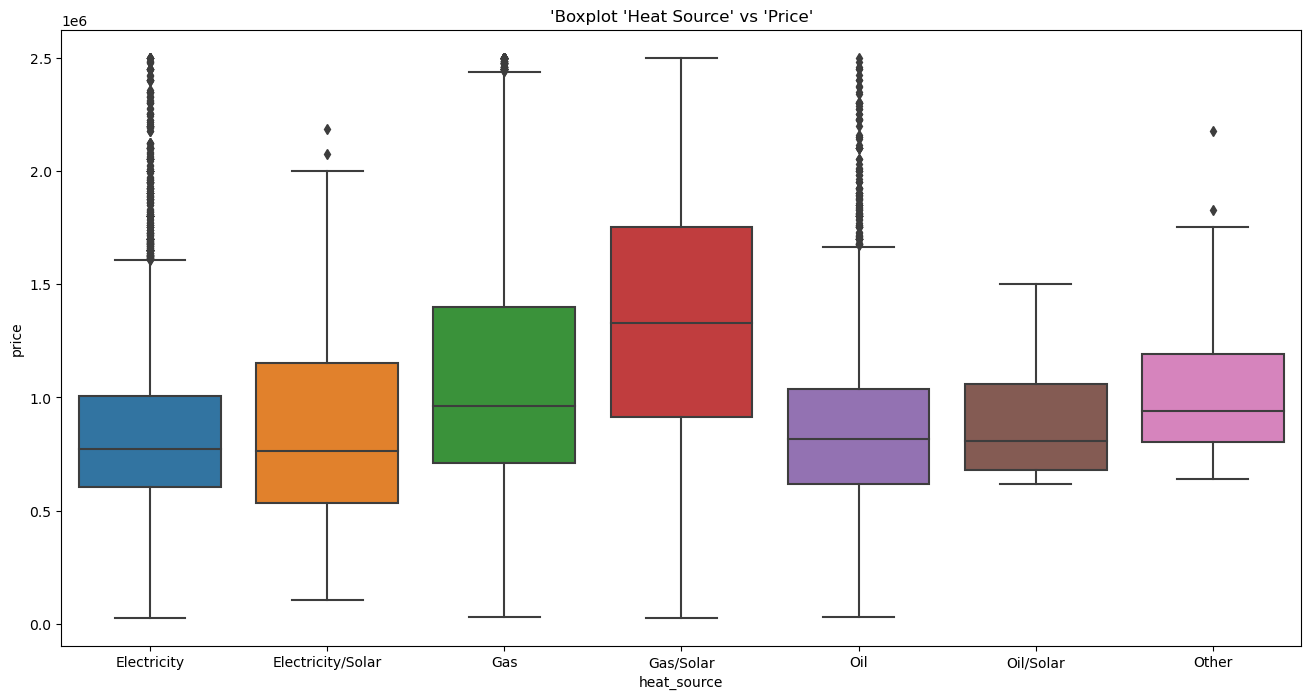

In [122]:
plt.figure(figsize=(16,8))
housingDF['heat_source'] = housingDF['heat_source'].astype('category')
sns.boxplot(x='heat_source', y='price', data=housingDF)
plt.title("'Boxplot 'Heat Source' vs 'Price'")

In [125]:
housingDF = housingDF.dropna()
housingDF['waterfront'] = housingDF['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
housingDF['greenbelt'] = housingDF['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
housingDF['nuisance'] = housingDF['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

Waterfront and Greenbelt seem to have some effect on price but nuisance effect seems minimal

# Change the Ordinal catagories into intigers so they can be used for modeling

In [ ]:
housingDF['grade'] = housingDF['grade'].str.extract(r'(\d+)').astype(int)
housingDF['grade'].unique()

array([ 7,  9,  8,  6, 10,  5,  4, 11,  3, 12])

In [ ]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
housingDF['condition'] = housingDF['condition'].map(condition_mapping)
housingDF['condition'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [ ]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
housingDF['view'] = housingDF['view'].map(view_mapping)
housingDF['view'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

In [ ]:
housingDF = housingDF.drop(['heat_source'], axis=1)

Decided to adjust for inflation based on year sold for any price prior to 2022 so the $ of one record is equal to 

In [ ]:
housingDF['date'] = pd.to_datetime(housingDF['date'])
housingDF['price'] = housingDF.apply(lambda row: cpi.inflate(row['price'],row['date'].year) if row['date'].year < 2022 else row['price'], axis=1)

In [ ]:
housingDF['has_been_renovated'] = np.where(housingDF['yr_renovated'] != 0, 1, 0)

In [ ]:
housingDF['zip_code'] = housingDF['address'].str[-20:-15]

In [ ]:
# First, calculate the mean sqft_living for each zip code
zip_code_sqft_lot = housingDF.groupby('zip_code')['sqft_lot'].mean()

# Next, divide the zip codes into sq_ft categories based on their mean sqft_living
zip_code_categories = pd.cut(zip_code_sqft_lot, bins=80, labels=False, retbins=False)

# Count the number of rows in the crime dataset grouped by zip code
zip_code_crime = crime.groupby('zip')['case_number'].count()
zip_code_count = housingDF.groupby('zip_code')['zip_code'].count()

# Finally, add the price category as a new column to the train_data dataframe
housingDF['zip_code_category'] = housingDF['zip_code'].map(zip_code_categories)

# Map the bin to the corresponding zip code in data
housingDF['zip_code_category_crime'] = housingDF['zip_code'].map(zip_code_crime) / housingDF['zip_code'].map(zip_code_count)
housingDF['zip_code_category_crime'].fillna(0, inplace=True)


housingDF['has_basement'] = (housingDF['sqft_basement'] > 0).astype(int)
housingDF['has_patio'] = (housingDF['sqft_patio'] > 0).astype(int)
housingDF['sqft_garage'] = (housingDF['sqft_garage'] > 0).astype(int)


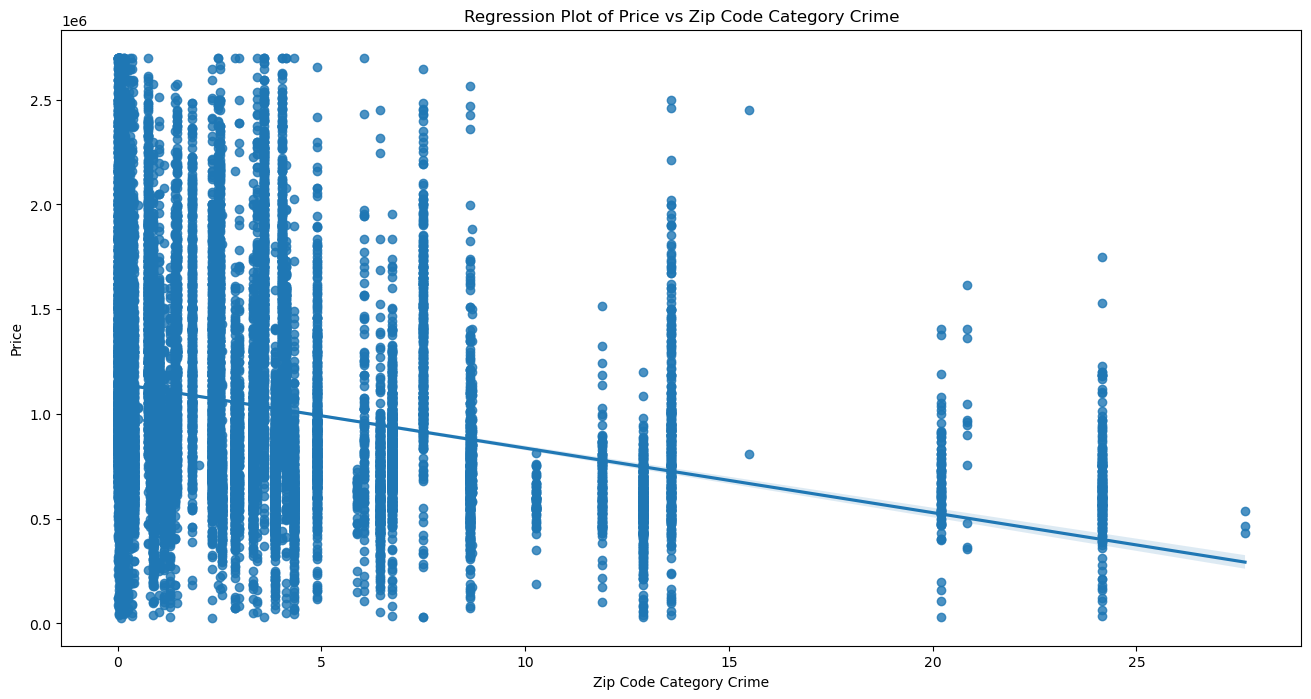

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x='zip_code_category_crime', y='price', data=housingDF)
plt.xlabel('Zip Code Category Crime')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Zip Code Category Crime')
plt.show()

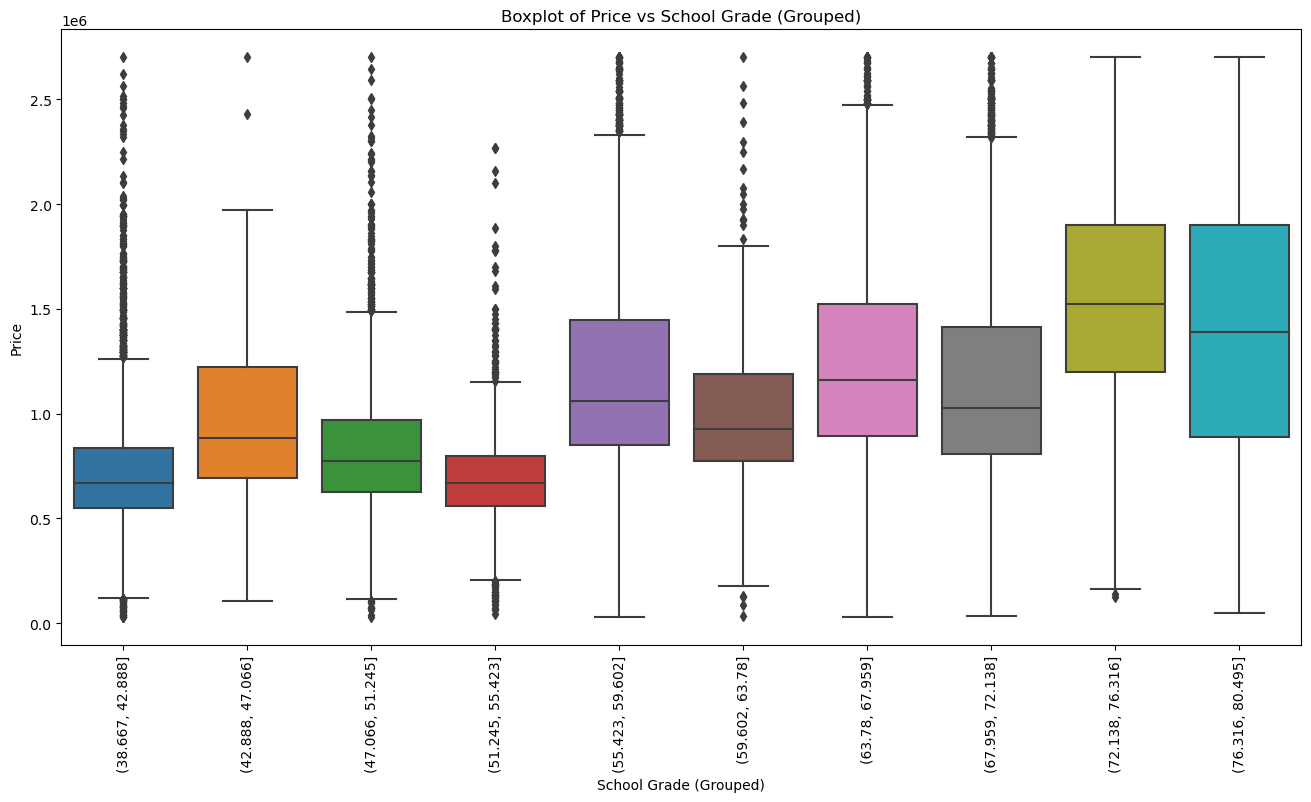

In [ ]:
housingDF['school_grade_grouped'] = pd.cut(housingDF['school_grade'], bins=10)

plt.figure(figsize=(16,8))
sns.boxplot(x='school_grade_grouped', y='price', data=housingDF)

plt.xlabel('School Grade (Grouped)')
plt.ylabel('Price')
plt.title('Boxplot of Price vs School Grade (Grouped)')
plt.xticks(rotation=90)
plt.show()

In [131]:
housingDF['distance'] = np.log(housingDF['distance']+1)
housingDF['distance'].describe()

count    24042.000000
mean         0.443377
std          0.044055
min          0.029689
25%          0.424067
50%          0.452453
75%          0.472472
max          0.494410
Name: distance, dtype: float64

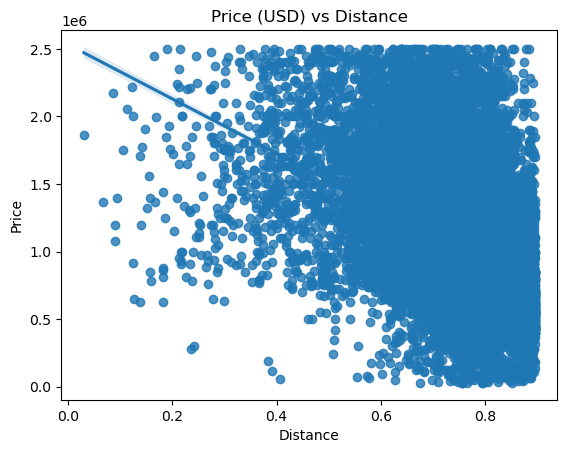

In [129]:
sns.regplot(x='distance', y='price', data=housingDF)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Price vs Distance')
plt.show()

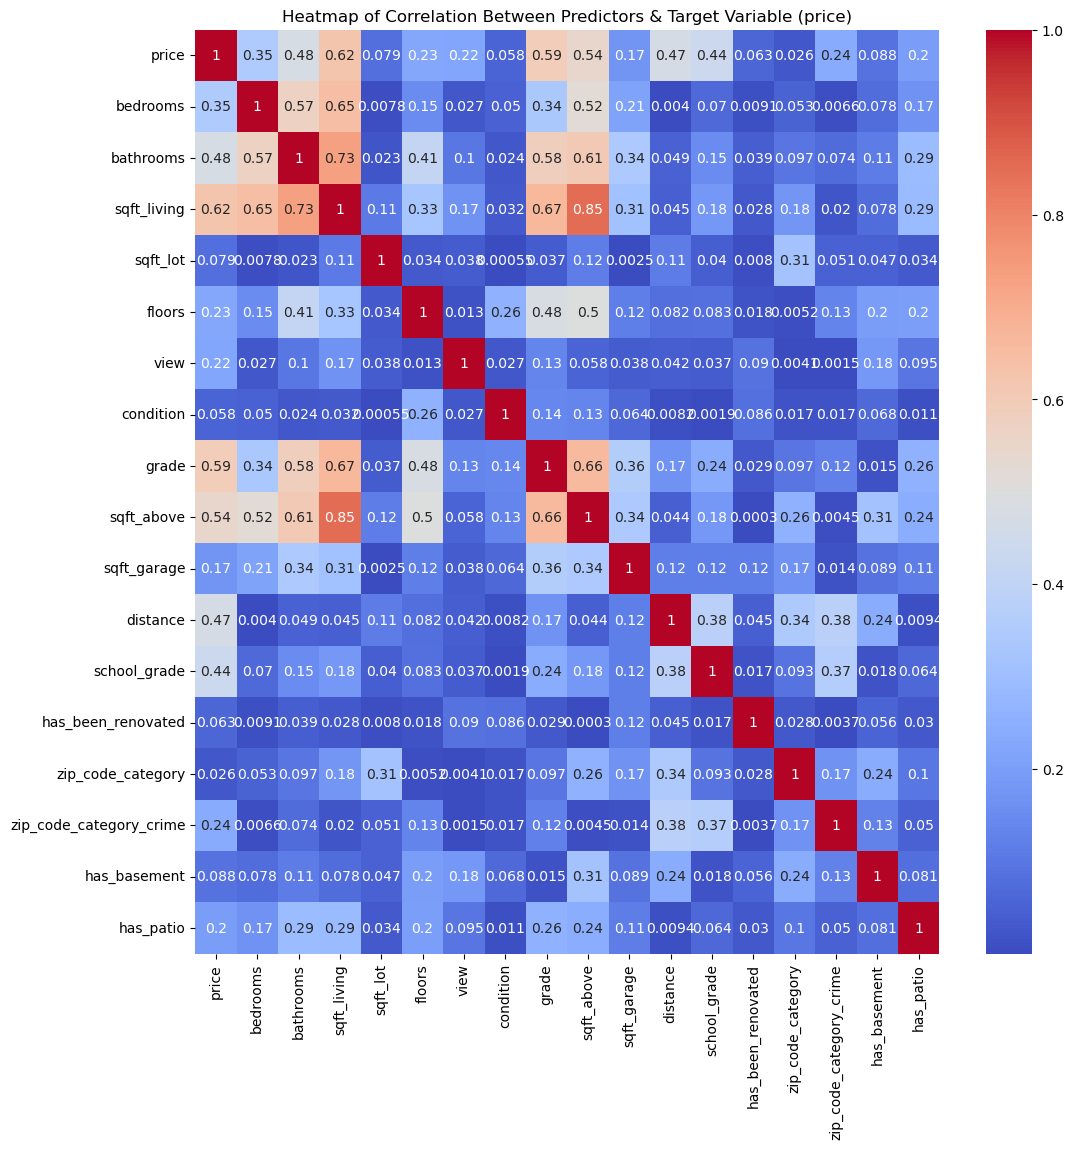

In [42]:
# set up figure size
fig, ax = plt.subplots(figsize=(12, 12))

# set up correlation matrix
corr = abs(housingDF.drop(['id','sqft_basement','sqft_patio','yr_built','yr_renovated','lat','long'], axis=1).corr())

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Correlations Between Predictive Variables and Price");

plt.show()

# Initial Model
    Before One Hot Incoding Zip Code

In [43]:
X = housingDF.drop(['price','sewer_system','zip_code','address','date'], axis=1)
y = housingDF['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                       float64
id                            int64
bedrooms                      int64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
waterfront                 category
greenbelt                  category
nuisance                   category
view                          int64
condition                     int64
grade                         int32
sqft_above                    int64
sqft_basement                 int64
sqft_garage                   int32
sqft_patio                    int64
yr_built                      int64
yr_renovated                  int64
lat                         float64
long                        float64
distance                    float64
school_grade                float64
has_been_renovated            int32
zip_code_category             int64
zip_code_category_crime     float64
has_basement                  int32
has_patio                     int32
school_grade_grouped       category
dtype: object. The data was
0        6.750000e+05
1        9.936251e+05
2        3.358885e+05
3        8.370212e+05
4        6.399162e+05
             ...     
30150    1.679442e+06
30151    1.418076e+06
30152    8.000000e+05
30153    7.750000e+05
30154    5.000000e+05
Name: price, Length: 24042, dtype: float64
and
        const          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0        1.0  7399300360         4        1.0         1180      7140     1.0   
1        1.0  8910500230         5        2.5         2770      6703     1.0   
2        1.0  1180000275         6        2.0         2880      6156     1.0   
3        1.0  1604601802         3        3.0         2160      1400     2.0   
4        1.0  8562780790         2        2.0         1120       758     2.0   
...      ...         ...       ...        ...          ...       ...     ...   
30150    1.0  7834800180         5        2.0         1910      4000     1.5   
30151    1.0   194000695         3        2.0         2020      5800     2.0   
30152    1.0  7960100080         3        2.0         1620      3600     1.0   
30153    1.0  2781280080         3        2.5         2570      2889     2.0   
30154    1.0  9557800100         3        1.5         1200     11058     1.0   

      waterfront greenbelt nuisance  view  condition  grade  sqft_above  \
0              0         0        0     1          4      7        1180   
1              0         0        1     3          3      7        1570   
2              0         0        0     3          3      7        1580   
3              0         0        0     3          3      9        1090   
4              0         0        1     1          3      7        1120   
...          ...       ...      ...   ...        ...    ...         ...   
30150          0         0        0     1          4      8        1600   
30151          0         0        0     2          3      7        2020   
30152          0         0        1     1          3      7         940   
30153          0         0        0     1          3      8        1830   
30154          0         0        0     1          3      7        1200   

       sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0                  0            0          40      1969             0   
1               1570            0         240      1950             0   
2               1580            0           0      1956             0   
3               1070            1         270      2010             0   
4                550            1          30      2012             0   
...              ...          ...         ...       ...           ...   
30150           1130            0         210      1921             0   
30151              0            0         520      2011             0   
30152            920            1         110      1995             0   
30153            740            1         100      2006             0   
30154              0            1           0      1965             0   

             lat       long  distance  school_grade  has_been_renovated  \
0      47.461975 -122.19052  2.488536     49.046699                   0   
1      47.711525 -122.35591  2.151631     70.535746                   0   
2      47.502045 -122.22520  2.000007     49.046699                   0   
3      47.566110 -122.29020  1.851564     58.657228                   0   
4      47.532470 -122.07188  1.989537     72.108463                   0   
...          ...        ...       ...           ...                 ...   
30150  47.664740 -122.32940  1.605390     58.657228                   0   
30151  47.565610 -122.38851  2.361239     41.926799                   0   
30152  47.610395 -122.29585  1.662360     58.657228                   0   
30153  47.449490 -122.18908  2.597292     49.046699                   0   
30154  47.435840 -122.32634  2.828203     41.926799                   0   

       zip_code_category  zip_code_category_crime  has_basement  has_patio  \
0                      3                 0.165138             0          1   
1                      1                 6.740964             1          1   
2                      2                 6.443570             1          0   
3                      1                 0.161017             1          1   
4                     12                 1.811475             1          1   
...                  ...                      ...           ...        ...   
30150                  0                 0.065596             1          1   
30151                  0                 0.039894             0          1   
30152                  0                 0.085714             1          1   
30153                  3                 0.165138             1          1   
30154                  3                20.193548             0          0   

      school_grade_grouped  
0         (47.066, 51.245]  
1         (67.959, 72.138]  
2         (47.066, 51.245]  
3         (55.423, 59.602]  
4         (67.959, 72.138]  
...                    ...  
30150     (55.423, 59.602]  
30151     (38.667, 42.888]  
30152     (55.423, 59.602]  
30153     (47.066, 51.245]  
30154     (38.667, 42.888]  

[24042 rows x 29 columns]
before. After,
[675000.         993625.12455253 335888.49319113 ... 800000.
 775000.         500000.        ]
[[1.0 7399300360 4 ... 0 1 Interval(47.066, 51.245, closed='right')]
 [1.0 8910500230 5 ... 1 1 Interval(67.959, 72.138, closed='right')]
 [1.0 1180000275 6 ... 1 0 Interval(47.066, 51.245, closed='right')]
 ...
 [1.0 7960100080 3 ... 1 1 Interval(55.423, 59.602, closed='right')]
 [1.0 2781280080 3 ... 1 1 Interval(47.066, 51.245, closed='right')]
 [1.0 9557800100 3 ... 0 0 Interval(38.667, 42.888, closed='right')]].

# One Hot Incoding Zip Codes

In [44]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(housingDF['zip_code'], drop_first=True)
#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
housingDF = pd.concat([housingDF, zipcode_ohe], axis=1)

In [45]:
housingDF.drop(['zip_code'], axis=1, inplace=True)

In [46]:
X = housingDF.drop(['price','sewer_system','address','date'], axis=1)
y = housingDF['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const          float64
id               int64
bedrooms         int64
bathrooms      float64
sqft_living      int64
                ...   
98188            uint8
98198            uint8
98199            uint8
98272            uint8
98296            uint8
Length: 101, dtype: object. The data was
0        6.750000e+05
1        9.936251e+05
2        3.358885e+05
3        8.370212e+05
4        6.399162e+05
             ...     
30150    1.679442e+06
30151    1.418076e+06
30152    8.000000e+05
30153    7.750000e+05
30154    5.000000e+05
Name: price, Length: 24042, dtype: float64
and
        const          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0        1.0  7399300360         4        1.0         1180      7140     1.0   
1        1.0  8910500230         5        2.5         2770      6703     1.0   
2        1.0  1180000275         6        2.0         2880      6156     1.0   
3        1.0  1604601802         3        3.0         2160      1400     2.0   
4        1.0  8562780790         2        2.0         1120       758     2.0   
...      ...         ...       ...        ...          ...       ...     ...   
30150    1.0  7834800180         5        2.0         1910      4000     1.5   
30151    1.0   194000695         3        2.0         2020      5800     2.0   
30152    1.0  7960100080         3        2.0         1620      3600     1.0   
30153    1.0  2781280080         3        2.5         2570      2889     2.0   
30154    1.0  9557800100         3        1.5         1200     11058     1.0   

      waterfront greenbelt nuisance  view  condition  grade  sqft_above  \
0              0         0        0     1          4      7        1180   
1              0         0        1     3          3      7        1570   
2              0         0        0     3          3      7        1580   
3              0         0        0     3          3      9        1090   
4              0         0        1     1          3      7        1120   
...          ...       ...      ...   ...        ...    ...         ...   
30150          0         0        0     1          4      8        1600   
30151          0         0        0     2          3      7        2020   
30152          0         0        1     1          3      7         940   
30153          0         0        0     1          3      8        1830   
30154          0         0        0     1          3      7        1200   

       sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0                  0            0          40      1969             0   
1               1570            0         240      1950             0   
2               1580            0           0      1956             0   
3               1070            1         270      2010             0   
4                550            1          30      2012             0   
...              ...          ...         ...       ...           ...   
30150           1130            0         210      1921             0   
30151              0            0         520      2011             0   
30152            920            1         110      1995             0   
30153            740            1         100      2006             0   
30154              0            1           0      1965             0   

             lat       long  distance  school_grade  has_been_renovated  \
0      47.461975 -122.19052  2.488536     49.046699                   0   
1      47.711525 -122.35591  2.151631     70.535746                   0   
2      47.502045 -122.22520  2.000007     49.046699                   0   
3      47.566110 -122.29020  1.851564     58.657228                   0   
4      47.532470 -122.07188  1.989537     72.108463                   0   
...          ...        ...       ...           ...                 ...   
30150  47.664740 -122.32940  1.605390     58.657228                   0   
30151  47.565610 -122.38851  2.361239     41.926799                   0   
30152  47.610395 -122.29585  1.662360     58.657228                   0   
30153  47.449490 -122.18908  2.597292     49.046699                   0   
30154  47.435840 -122.32634  2.828203     41.926799                   0   

       zip_code_category  zip_code_category_crime  has_basement  has_patio  \
0                      3                 0.165138             0          1   
1                      1                 6.740964             1          1   
2                      2                 6.443570             1          0   
3                      1                 0.161017             1          1   
4                     12                 1.811475             1          1   
...                  ...                      ...           ...        ...   
30150                  0                 0.065596             1          1   
30151                  0                 0.039894             0          1   
30152                  0                 0.085714             1          1   
30153                  3                 0.165138             1          1   
30154                  3                20.193548             0          0   

      school_grade_grouped  98002  98003  98004  98005  98006  98007  98008  \
0         (47.066, 51.245]      0      0      0      0      0      0      0   
1         (67.959, 72.138]      0      0      0      0      0      0      0   
2         (47.066, 51.245]      0      0      0      0      0      0      0   
3         (55.423, 59.602]      0      0      0      0      0      0      0   
4         (67.959, 72.138]      0      0      0      0      0      0      0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
30150     (55.423, 59.602]      0      0      0      0      0      0      0   
30151     (38.667, 42.888]      0      0      0      0      0      0      0   
30152     (55.423, 59.602]      0      0      0      0      0      0      0   
30153     (47.066, 51.245]      0      0      0      0      0      0      0   
30154     (38.667, 42.888]      0      0      0      0      0      0      0   

       98010  98011  98014  98019  98024  98027  98028  98029  98030  98031  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      1      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      0      0      0      0      0   
30151      0      0      0      0      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      0      0      0   
30153      0      0      0      0      0      0      0      0      0      0   
30154      0      0      0      0      0      0      0      0      0      0   

       98032  98033  98034  98038  98039  98040  98042  98045  98050  98051  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      0      0      0      0      0   
30151      0      0      0      0      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      0      0      0   
30153      0      0      0      0      0      0      0      0      0      0   
30154      0      0      0      0      0      0      0      0      0      0   

       98052  98053  98055  98056  98057  98058  98059  98065  98070  98072  \
0          0      0      1      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      0      0      0      0      0   
30151      0      0      0      0      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      0      0      0   
30153      0      0      1      0      0      0      0      0      0      0   
30154      0      0      0      0      0      0      0      0      0      0   

       98074  98075  98077  98092  98102  98103  98105  98106  98107  98108  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      1      0      0      0      0   
30151      0      0      0      0      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      0      0      0   
30153      0      0      0      0      0      0      0      0      0      0   
30154      0      0      0      0      0      0      0      0      0      0   

       98109  98112  98115  98116  98117  98118  98119  98122  98125  98126  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      1      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      0      0      0      0      0   
30151      0      0      0      1      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      1      0      0   
30153      0      0      0      0      0      0      0      0      0      0   
30154      0      0      0      0      0      0      0      0      0      0   

       98133  98136  98144  98146  98148  98155  98166  98168  98177  98178  \
0          0      0      0      0      0      0      0      0      0      0   
1          1      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      1   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30150      0      0      0      0      0      0      0      0      0      0   
30151      0      0      0      0      0      0      0      0      0      0   
30152      0      0      0      0      0      0      0      0      0      0   
30153      0      0      0      0      0      0      0      0      0      0   
30154      0      0      0      0      1      0      0      0      0      0   

       98188  98198  98199  98272  98296  
0          0      0      0      0      0  
1          0      0      0      0      0  
2          0      0      0      0      0  
3          0      0      0      0      0  
4          0      0      0      0      0  
...      ...    ...    ...    ...    ...  
30150      0      0      0      0      0  
30151      0      0      0      0      0  
30152      0      0      0      0      0  
30153      0      0      0      0      0  
30154      0      0      0      0      0  

[24042 rows x 101 columns]
before. After,
[675000.         993625.12455253 335888.49319113 ... 800000.
 775000.         500000.        ]
[[1.0 7399300360 4 ... 0 0 0]
 [1.0 8910500230 5 ... 0 0 0]
 [1.0 1180000275 6 ... 0 0 0]
 ...
 [1.0 7960100080 3 ... 0 0 0]
 [1.0 2781280080 3 ... 0 0 0]
 [1.0 9557800100 3 ... 0 0 0]].

# Checking Skewness and Kurtosis of the Category Columns

In [47]:
from scipy.stats import skew, kurtosis

# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category'])
data_kurtosis = kurtosis(data['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 4.066024162093477
Kurtosis: 27.80881907791652


In [48]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_living'])
data_kurtosis = kurtosis(housingDF['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.7021730141156806
Kurtosis: 0.2078176507739662


In [49]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_lot'])
data_kurtosis = kurtosis(housingDF['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 28.44037368477573
Kurtosis: 1428.4588235007436


In [50]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category_crime'])
data_kurtosis = kurtosis(housingDF['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 2.7997581128538576
Kurtosis: 10.139346042645103


In [51]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['school_grade'])
data_kurtosis = kurtosis(housingDF['school_grade'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.39995523909306124
Kurtosis: -1.1035221709841339


# Lets fix the columns we found that are skewed by using Log Transforms

In [71]:
housingDF['zip_code_category_crime'] = np.log(housingDF['zip_code_category_crime']+1)
housingDF['zip_code_category'] = np.log(housingDF['zip_code_category']+1)
housingDF['sqft_living'] = np.log(housingDF['sqft_living'])
housingDF['sqft_lot'] = np.log(housingDF['sqft_lot'])

In [53]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category_crime'])
data_kurtosis = kurtosis(housingDF['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6933194967884816
Kurtosis: -0.5820171042861313


In [54]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category'])
data_kurtosis = kurtosis(housingDF['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.33767293447200325
Kurtosis: -0.3885105099607902


In [55]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_lot'])
data_kurtosis = kurtosis(housingDF['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6462957404974558
Kurtosis: 3.0430030458533626


In [56]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_living'])
data_kurtosis = kurtosis(housingDF['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.29933458566351917
Kurtosis: -0.05900091074763392


# Replace Date, Year Build, and Year Renovated
* I added a column called years since build or renovated to replace the columns that woulden't work in a model as they are not really numeric 

In [57]:
housingDF['yr_renovated'] = np.where(housingDF['yr_renovated'] == 0, housingDF['yr_built'], housingDF['yr_renovated'])
housingDF['date'] = pd.to_datetime(housingDF['date'])
housingDF['year'] = housingDF['date'].dt.year
housingDF['years_since_build_or_renov'] = data['year'] - housingDF[['yr_built', 'yr_renovated']].min(axis=1)
housingDF.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [58]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24042 entries, 0 to 30154
Columns: 102 entries, id to years_since_build_or_renov
dtypes: category(4), float64(11), int32(5), int64(8), object(2), uint8(72)
memory usage: 6.2+ MB


# Train / Test Split

In [73]:
train_data, test_data, train_labels, test_labels = train_test_split(housingDF.drop(columns=["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement','sqft_patio','sqft_garage']), data["price"], test_size=0.33, random_state=42)


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16108 entries, 18059 to 29680
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   price                       16108 non-null  float64 
 1   sqft_lot                    16108 non-null  float64 
 2   waterfront                  16108 non-null  category
 3   view                        16108 non-null  int64   
 4   grade                       16108 non-null  int32   
 5   distance                    16108 non-null  float64 
 6   school_grade                16108 non-null  float64 
 7   has_been_renovated          16108 non-null  int32   
 8   zip_code_category           16108 non-null  float64 
 9   zip_code_category_crime     16108 non-null  float64 
 10  has_basement                16108 non-null  int32   
 11  school_grade_grouped        16108 non-null  category
 12  98002                       16108 non-null  uint8   
 13  98003       

In [74]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                         float64
bedrooms                        int64
bathrooms                     float64
sqft_living                   float64
sqft_lot                      float64
                               ...   
98198                           uint8
98199                           uint8
98272                           uint8
98296                           uint8
years_since_build_or_renov      int64
Length: 93, dtype: object. The data was
18059    9.828249e+05
23230    9.999990e+05
4506     6.800000e+05
14963    7.403015e+05
16876    6.000000e+05
             ...     
27063    1.322500e+06
6747     6.050000e+05
1068     2.000000e+06
19792    9.431338e+05
29680    8.532216e+05
Name: price, Length: 16108, dtype: float64
and
        const  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
18059    1.0         3        2.0     1.964437  2.187874     1.0          0   
23230    1.0         3        1.0     1.946348  2.184133     1.0          0   
4506     1.0         3        2.5     2.069310  2.327162     1.0          0   
14963    1.0         4        2.5     2.047605  2.115055     2.0          0   
16876    1.0         3        2.0     2.018673  2.185159     1.0          0   
...      ...       ...        ...          ...       ...     ...        ...   
27063    1.0         2        2.5     1.986917  2.064813     2.0          0   
6747     1.0         4        2.0     2.002632  2.208822     1.0          0   
1068     1.0         5        3.0     2.073368  2.170730     2.0          0   
19792    1.0         2        1.0     1.936915  2.142087     1.0          0   
29680    1.0         4        2.0     2.009775  2.165541     1.0          0   

      greenbelt nuisance  view  condition  grade  distance  school_grade  \
18059         0        0     1          4      7  1.777402     67.103517   
23230         0        0     1          3      7  1.662156     67.103517   
4506          0        0     1          4      8  3.195732     51.694544   
14963         0        0     1          3      8  2.723435     49.046699   
16876         0        0     1          5      7  2.659109     70.535746   
...         ...      ...   ...        ...    ...       ...           ...   
27063         0        0     1          3      8  1.375335     73.121797   
6747          0        0     1          3      7  2.964132     38.709272   
1068          1        0     1          3      8  2.553417     73.121797   
19792         0        0     1          3      7  1.341270     70.535746   
29680         0        0     1          4      7  2.595031     70.535746   

       has_been_renovated  zip_code_category  zip_code_category_crime  \
18059                   0           0.741276                 0.033534   
23230                   0           0.741276                 0.033534   
4506                    0           1.080418                 0.948807   
14963                   0           0.959135                 0.857153   
16876                   0           0.526589                 1.114002   
...                   ...                ...                      ...   
27063                   0           0.741276                 0.017468   
6747                    0           0.741276                 0.983172   
1068                    0           1.327761                 0.813612   
19792                   0           0.000000                 0.010710   
29680                   0           0.741276                 1.020034   

       has_basement  has_patio school_grade_grouped  98002  98003  98004  \
18059             1          1      (63.78, 67.959]      0      0      0   
23230             1          1      (63.78, 67.959]      0      0      0   
4506              1          1     (51.245, 55.423]      0      0      0   
14963             1          1     (47.066, 51.245]      0      0      0   
16876             0          1     (67.959, 72.138]      0      0      0   
...             ...        ...                  ...    ...    ...    ...   
27063             0          1     (72.138, 76.316]      0      0      0   
6747              1          1     (38.667, 42.888]      0      0      0   
1068              0          1     (72.138, 76.316]      0      0      0   
19792             1          0     (67.959, 72.138]      0      0      0   
29680             1          1     (67.959, 72.138]      0      0      0   

       98005  98006  98007  98008  98010  98011  98014  98019  98024  98027  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98028  98029  98030  98031  98032  98033  98034  98038  98039  98040  \
18059      0      0      0      0      0      0      1      0      0      0   
23230      0      0      0      0      0      0      1      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      1      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98042  98045  98050  98051  98052  98053  98055  98056  98057  98058  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       1      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      1   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      1      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98059  98065  98070  98072  98074  98075  98077  98092  98102  98103  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98105  98106  98107  98108  98109  98112  98115  98116  98117  98118  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      1      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98119  98122  98125  98126  98133  98136  98144  98146  98148  98155  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      1      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      1   

       98166  98168  98177  98178  98188  98198  98199  98272  98296  \
18059      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      1      0      0      0   
1068       0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0   

       years_since_build_or_renov  
18059                          50  
23230                          42  
4506                           40  
14963                           0  
16876                          38  
...                           ...  
27063                          17  
6747                           66  
1068                           11  
19792                         100  
29680                          64  

[16108 rows x 93 columns]
before. After,
[ 982824.85145957  999999.          680000.         ... 2000000.
  943133.84784293  853221.57434402]
[[1.0 3 2.0 ... 0 0 50]
 [1.0 3 1.0 ... 0 0 42]
 [1.0 3 2.5 ... 0 0 40]
 ...
 [1.0 5 3.0 ... 0 0 11]
 [1.0 2 1.0 ... 0 0 100]
 [1.0 4 2.0 ... 0 0 64]].

In [75]:
train_data.drop(["has_patio"], axis=1, inplace=True)
test_data.drop(["has_patio"], axis=1, inplace=True)

train_data.drop(["floors"], axis=1, inplace=True)
test_data.drop(["floors"], axis=1, inplace=True)

train_data.drop(["nuisance"], axis=1, inplace=True)
test_data.drop(["nuisance"], axis=1, inplace=True)

train_data.drop(['bathrooms'], axis=1, inplace=True)
test_data.drop(['bathrooms'], axis=1, inplace=True)

train_data.drop(["greenbelt"], axis=1, inplace=True)
test_data.drop(["greenbelt"], axis=1, inplace=True)

train_data.drop(["bedrooms"], axis=1, inplace=True)
test_data.drop(["bedrooms"], axis=1, inplace=True)

train_data.drop(["condition"], axis=1, inplace=True)
test_data.drop(["condition"], axis=1, inplace=True)

train_data.drop(["sqft_living"], axis=1, inplace=True)
test_data.drop(["sqft_living"], axis=1, inplace=True)

                   

In [76]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
train_data['years_since_build_or_renov'] = scaler.transform(train_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
test_data['years_since_build_or_renov'] = scaler.transform(test_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
train_data['school_grade'] = scaler.transform(train_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
test_data['school_grade'] = scaler.transform(test_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['distance']])

# Transform the 'years_since_build_or_renov' column
train_data['distance'] = scaler.transform(train_data[['distance']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['distance']])

# Transform the 'years_since_build_or_renov' column
test_data['distance'] = scaler.transform(test_data[['distance']])

In [77]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                          float64
sqft_lot                       float64
waterfront                    category
view                             int64
grade                            int32
                                ...   
98198                            uint8
98199                            uint8
98272                            uint8
98296                            uint8
years_since_build_or_renov     float64
Length: 85, dtype: object. The data was
18059    9.828249e+05
23230    9.999990e+05
4506     6.800000e+05
14963    7.403015e+05
16876    6.000000e+05
             ...     
27063    1.322500e+06
6747     6.050000e+05
1068     2.000000e+06
19792    9.431338e+05
29680    8.532216e+05
Name: price, Length: 16108, dtype: float64
and
        const  sqft_lot waterfront  view  grade  distance  school_grade  \
18059    1.0  2.187874          0     1      7 -0.637060      0.583090   
23230    1.0  2.184133          0     1      7 -0.818635      0.583090   
4506     1.0  2.327162          0     1      8  1.597585     -0.726560   
14963    1.0  2.115055          0     1      8  0.853458     -0.951607   
16876    1.0  2.185159          0     1      7  0.752111      0.874805   
...      ...       ...        ...   ...    ...       ...           ...   
27063    1.0  2.064813          0     1      8 -1.270536      1.094600   
6747     1.0  2.208822          0     1      7  1.232689     -1.830213   
1068     1.0  2.170730          0     1      8  0.585588      1.094600   
19792    1.0  2.142087          0     1      7 -1.324207      0.874805   
29680    1.0  2.165541          0     1      7  0.651152      0.874805   

       has_been_renovated  zip_code_category  zip_code_category_crime  \
18059                   0           0.741276                 0.033534   
23230                   0           0.741276                 0.033534   
4506                    0           1.080418                 0.948807   
14963                   0           0.959135                 0.857153   
16876                   0           0.526589                 1.114002   
...                   ...                ...                      ...   
27063                   0           0.741276                 0.017468   
6747                    0           0.741276                 0.983172   
1068                    0           1.327761                 0.813612   
19792                   0           0.000000                 0.010710   
29680                   0           0.741276                 1.020034   

       has_basement school_grade_grouped  98002  98003  98004  98005  98006  \
18059             1      (63.78, 67.959]      0      0      0      0      0   
23230             1      (63.78, 67.959]      0      0      0      0      0   
4506              1     (51.245, 55.423]      0      0      0      0      0   
14963             1     (47.066, 51.245]      0      0      0      0      0   
16876             0     (67.959, 72.138]      0      0      0      0      0   
...             ...                  ...    ...    ...    ...    ...    ...   
27063             0     (72.138, 76.316]      0      0      0      0      0   
6747              1     (38.667, 42.888]      0      0      0      0      0   
1068              0     (72.138, 76.316]      0      0      0      0      0   
19792             1     (67.959, 72.138]      0      0      0      0      0   
29680             1     (67.959, 72.138]      0      0      0      0      0   

       98007  98008  98010  98011  98014  98019  98024  98027  98028  98029  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98030  98031  98032  98033  98034  98038  98039  98040  98042  98045  \
18059      0      0      0      0      1      0      0      0      0      0   
23230      0      0      0      0      1      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      1      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      1      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98050  98051  98052  98053  98055  98056  98057  98058  98059  98065  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      1      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      1      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98070  98072  98074  98075  98077  98092  98102  98103  98105  98106  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98107  98108  98109  98112  98115  98116  98117  98118  98119  98122  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      1      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98125  98126  98133  98136  98144  98146  98148  98155  98166  98168  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      1      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      1      0      0   

       98177  98178  98188  98198  98199  98272  98296  \
18059      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0   
6747       0      0      0      1      0      0      0   
1068       0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0   

       years_since_build_or_renov  
18059                    0.013768  
23230                   -0.236252  
4506                    -0.298757  
14963                   -1.548855  
16876                   -0.361262  
...                           ...  
27063                   -1.017563  
6747                     0.513807  
1068                    -1.205078  
19792                    1.576390  
29680                    0.451302  

[16108 rows x 85 columns]
before. After,
[ 982824.85145957  999999.          680000.         ... 2000000.
  943133.84784293  853221.57434402]
[[1.0 2.1878740786631643 0 ... 0 0 0.013767532381936771]
 [1.0 2.184133348721805 0 ... 0 0 -0.23625209739059758]
 [1.0 2.3271619269523756 0 ... 0 0 -0.2987570048337312]
 ...
 [1.0 2.1707297891324133 0 ... 0 0 -1.2050781627591682]
 [1.0 2.1420868489375264 0 ... 0 0 1.5763902184602765]
 [1.0 2.1655409522312277 0 ... 0 0 0.4513018844838719]].

In [64]:
# Fit the model to the training data
model = sm.OLS(train_data['price'], train_data.drop(['price'], axis=1))
results = model.fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and bedrooms                        int64
bathrooms                     float64
sqft_living                   float64
sqft_lot                      float64
floors                        float64
                               ...   
98198                           uint8
98199                           uint8
98272                           uint8
98296                           uint8
years_since_build_or_renov      int64
Length: 92, dtype: object. The data was
18059    9.828249e+05
23230    9.999990e+05
4506     6.800000e+05
14963    7.403015e+05
16876    6.000000e+05
             ...     
27063    1.322500e+06
6747     6.050000e+05
1068     2.000000e+06
19792    9.431338e+05
29680    8.532216e+05
Name: price, Length: 16108, dtype: float64
and
        bedrooms  bathrooms  sqft_living   sqft_lot  floors waterfront  \
18059         3        2.0     7.130899   8.916238     1.0          0   
23230         3        1.0     7.003065   8.882947     1.0          0   
4506          3        2.5     7.919356  10.248813     1.0          0   
14963         4        2.5     7.749322   8.290042     2.0          0   
16876         3        2.0     7.528332   8.892062     1.0          0   
...         ...        ...          ...        ...     ...        ...   
27063         2        2.5     7.293018   7.883823     2.0          0   
6747          4        2.0     7.408531   9.104980     1.0          0   
1068          5        3.0     7.951559   8.764678     2.0          0   
19792         2        1.0     6.937314   8.517193     1.0          0   
29680         4        2.0     7.461640   8.719317     1.0          0   

      greenbelt nuisance  view  condition  grade  distance  school_grade  \
18059         0        0     1          4      7  1.777402     67.103517   
23230         0        0     1          3      7  1.662156     67.103517   
4506          0        0     1          4      8  3.195732     51.694544   
14963         0        0     1          3      8  2.723435     49.046699   
16876         0        0     1          5      7  2.659109     70.535746   
...         ...      ...   ...        ...    ...       ...           ...   
27063         0        0     1          3      8  1.375335     73.121797   
6747          0        0     1          3      7  2.964132     38.709272   
1068          1        0     1          3      8  2.553417     73.121797   
19792         0        0     1          3      7  1.341270     70.535746   
29680         0        0     1          4      7  2.595031     70.535746   

       has_been_renovated  zip_code_category  zip_code_category_crime  \
18059                   0           1.098612                 0.034103   
23230                   0           1.098612                 0.034103   
4506                    0           1.945910                 1.582628   
14963                   0           1.609438                 1.356441   
16876                   0           0.693147                 2.046526   
...                   ...                ...                      ...   
27063                   0           1.098612                 0.017622   
6747                    0           1.098612                 1.672922   
1068                    0           2.772589                 1.256042   
19792                   0           0.000000                 0.010767   
29680                   0           1.098612                 1.773289   

       has_basement  has_patio school_grade_grouped  98002  98003  98004  \
18059             1          1      (63.78, 67.959]      0      0      0   
23230             1          1      (63.78, 67.959]      0      0      0   
4506              1          1     (51.245, 55.423]      0      0      0   
14963             1          1     (47.066, 51.245]      0      0      0   
16876             0          1     (67.959, 72.138]      0      0      0   
...             ...        ...                  ...    ...    ...    ...   
27063             0          1     (72.138, 76.316]      0      0      0   
6747              1          1     (38.667, 42.888]      0      0      0   
1068              0          1     (72.138, 76.316]      0      0      0   
19792             1          0     (67.959, 72.138]      0      0      0   
29680             1          1     (67.959, 72.138]      0      0      0   

       98005  98006  98007  98008  98010  98011  98014  98019  98024  98027  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98028  98029  98030  98031  98032  98033  98034  98038  98039  98040  \
18059      0      0      0      0      0      0      1      0      0      0   
23230      0      0      0      0      0      0      1      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      1      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98042  98045  98050  98051  98052  98053  98055  98056  98057  98058  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       1      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      1   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      1      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98059  98065  98070  98072  98074  98075  98077  98092  98102  98103  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98105  98106  98107  98108  98109  98112  98115  98116  98117  98118  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      1      0   
29680      0      0      0      0      0      0      0      0      0      0   

       98119  98122  98125  98126  98133  98136  98144  98146  98148  98155  \
18059      0      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      1      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      0      0      0      0      0   
1068       0      0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0      1   

       98166  98168  98177  98178  98188  98198  98199  98272  98296  \
18059      0      0      0      0      0      0      0      0      0   
23230      0      0      0      0      0      0      0      0      0   
4506       0      0      0      0      0      0      0      0      0   
14963      0      0      0      0      0      0      0      0      0   
16876      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...   
27063      0      0      0      0      0      0      0      0      0   
6747       0      0      0      0      0      1      0      0      0   
1068       0      0      0      0      0      0      0      0      0   
19792      0      0      0      0      0      0      0      0      0   
29680      0      0      0      0      0      0      0      0      0   

       years_since_build_or_renov  
18059                          50  
23230                          42  
4506                           40  
14963                           0  
16876                          38  
...                           ...  
27063                          17  
6747                           66  
1068                           11  
19792                         100  
29680                          64  

[16108 rows x 92 columns]
before. After,
[ 982824.85145957  999999.          680000.         ... 2000000.
  943133.84784293  853221.57434402]
[[3 2.0 7.1308988302963465 ... 0 0 50]
 [3 1.0 7.003065458786462 ... 0 0 42]
 [3 2.5 7.919356190660617 ... 0 0 40]
 ...
 [5 3.0 7.951559331155252 ... 0 0 11]
 [2 1.0 6.937314081223682 ... 0 0 100]
 [4 2.0 7.461640392208575 ... 0 0 64]].

In [ ]:

# Use the fitted model to make predictions on the test data
X_test = sm.add_constant(test_data.drop(['price'], axis=1))
predictions = model.predict(X_test)


# Compare the predicted values with the actual prices in the test data
sns.regplot(x=test_data['price'], y=predictions, line = 's')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# calculate the residuals
#residuals = model2.resid_response

residuals = model.resid

# Plot the residuals against the fitted values to check for linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality

sm.qqplot(residuals, line='s')
plt.title("Normality check (Q-Q plot)")
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))

# Calculate the MAE
mae = mean_absolute_error(test_data['price'], predictions)

r2 = r2_score(test_data['price'], predictions)


print("RMSE:", rmse)
print("MAE:", mae)
print('R-squared score:', r2*100)

NameError: name 'predictions' is not defined